payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64
                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000   
29722  0

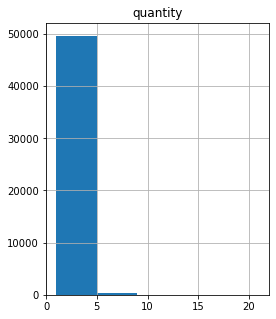

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()